In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pickle
%matplotlib inline

In [2]:
df = pd.read_csv('clustering.csv')

In [3]:
df.groupby('category')['cluster'].mean()

category
comp.graphics         0.134
rec.autos             1.602
talk.religion.misc    0.986
Name: cluster, dtype: float64

In [37]:
len(df)

3000

In [4]:
def cat_map(category):
    if category == 'comp.graphics':
        return 0
    if category == 'rec.autos':
        return 2
    if category == 'talk.religion.misc':
        return 1
def is_misclassified(category,cluster):
    return cat_map(category) != cluster

In [5]:
df['misclassified'] = df[['category','cluster']].apply(lambda arg : is_misclassified(*arg), axis=1)

In [6]:
df.head(20)

,Unnamed: 0,component_1,component_2,component_3,category,cluster,misclassified
0,0,0.316386,-0.066240,-0.068667,talk.religion.misc,1,False
1,1,0.494718,-0.232141,-0.111932,talk.religion.misc,1,False
2,2,0.301825,-0.103169,-0.081573,talk.religion.misc,1,False
3,3,0.322003,-0.047842,-0.185212,talk.religion.misc,1,False
4,4,0.210853,-0.113520,-0.171009,talk.religion.misc,1,False
5,5,0.306416,-0.191707,-0.170987,talk.religion.misc,1,False
6,6,0.223858,-0.081570,-0.031507,talk.religion.misc,1,False
7,7,0.385044,-0.133366,-0.137953,talk.religion.misc,1,False
8,8,0.196192,-0.024169,-0.038066,talk.religion.misc,1,False
9,9,0.483066,-0.316602,-0.374242,talk.religion.misc,1,False


In [7]:
df[df['misclassified']].count()

Unnamed: 0       455
component_1      455
component_2      455
component_3      455
category         455
cluster          455
misclassified    455
dtype: int64

In [8]:
df[df['misclassified']].groupby('category').count()

,Unnamed: 0,component_1,component_2,component_3,cluster,misclassified
category,,,,,,
comp.graphics,114,114,114,114,114,114
rec.autos,301,301,301,301,301,301
talk.religion.misc,40,40,40,40,40,40


In [9]:
df.groupby('category').count()

,Unnamed: 0,component_1,component_2,component_3,cluster,misclassified
category,,,,,,
comp.graphics,1000,1000,1000,1000,1000,1000
rec.autos,1000,1000,1000,1000,1000,1000
talk.religion.misc,1000,1000,1000,1000,1000,1000


In [44]:
def apply_color(category,misclassified):
    if not misclassified:
        return 'w'
    else:
        if cat_map(category)==0:
            return 'b'
        if cat_map(category)==1:
            return 'c'
        if cat_map(category)==2:
            return 'r'

In [45]:
df['color'] = df[['category','misclassified']].apply(lambda arg : apply_color(*arg), axis=1)

In [46]:
df.head(20)

,Unnamed: 0,component_1,component_2,component_3,category,cluster,misclassified,color
0,0,0.277724,-0.065518,-0.082424,talk.religion.misc,0,False,w
1,1,0.509169,-0.234509,-0.136832,talk.religion.misc,0,False,w
2,2,0.323452,-0.143818,-0.077588,talk.religion.misc,0,False,w
3,3,0.306399,-0.059290,-0.184240,talk.religion.misc,0,False,w
4,4,0.201633,-0.125953,-0.182236,talk.religion.misc,0,False,w
5,5,0.298666,-0.187649,-0.157786,talk.religion.misc,0,False,w
6,6,0.289261,-0.118257,-0.042561,talk.religion.misc,0,False,w
7,7,0.367016,-0.092187,-0.169736,talk.religion.misc,0,False,w
8,8,0.173225,-0.024667,-0.022176,talk.religion.misc,0,False,w
9,9,0.479521,-0.319976,-0.456416,talk.religion.misc,0,False,w


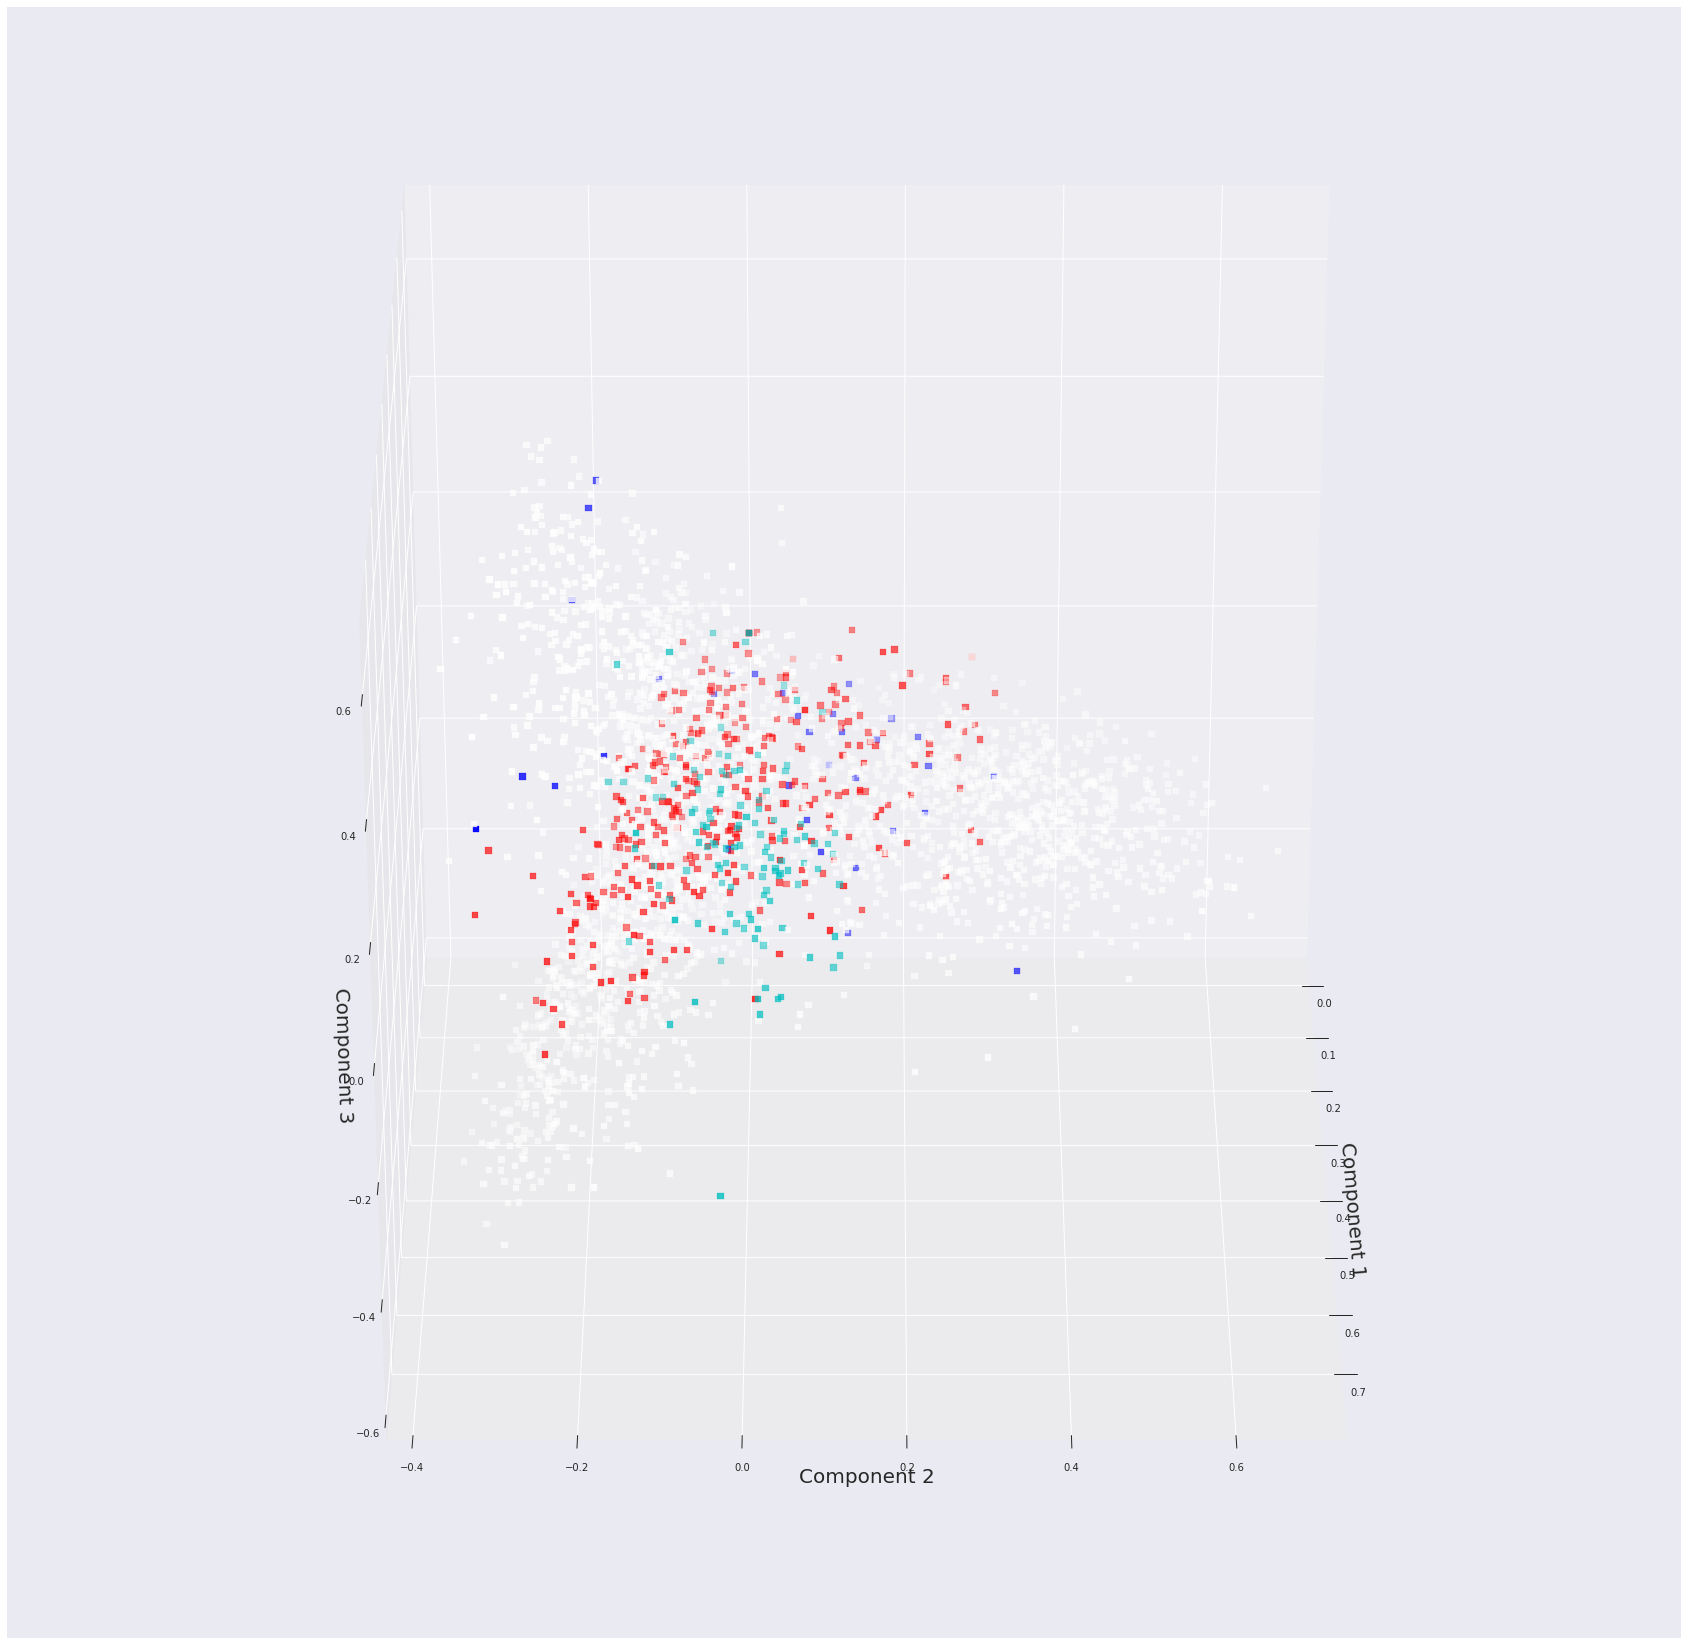

In [47]:
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(111, projection='3d')
x = np.array(df['component_1'])
y = np.array(df['component_2'])
z = np.array(df['component_3'])
ax.set_xlabel('Component 1', fontsize=20)
ax.set_ylabel('Component 2', fontsize=20)
ax.set_zlabel('Component 3', fontsize=20)

ax.scatter(x,y,z, marker="s", c=df["color"], s=40)
#ax.view_init(30, 135)
ax.view_init(30, 0)

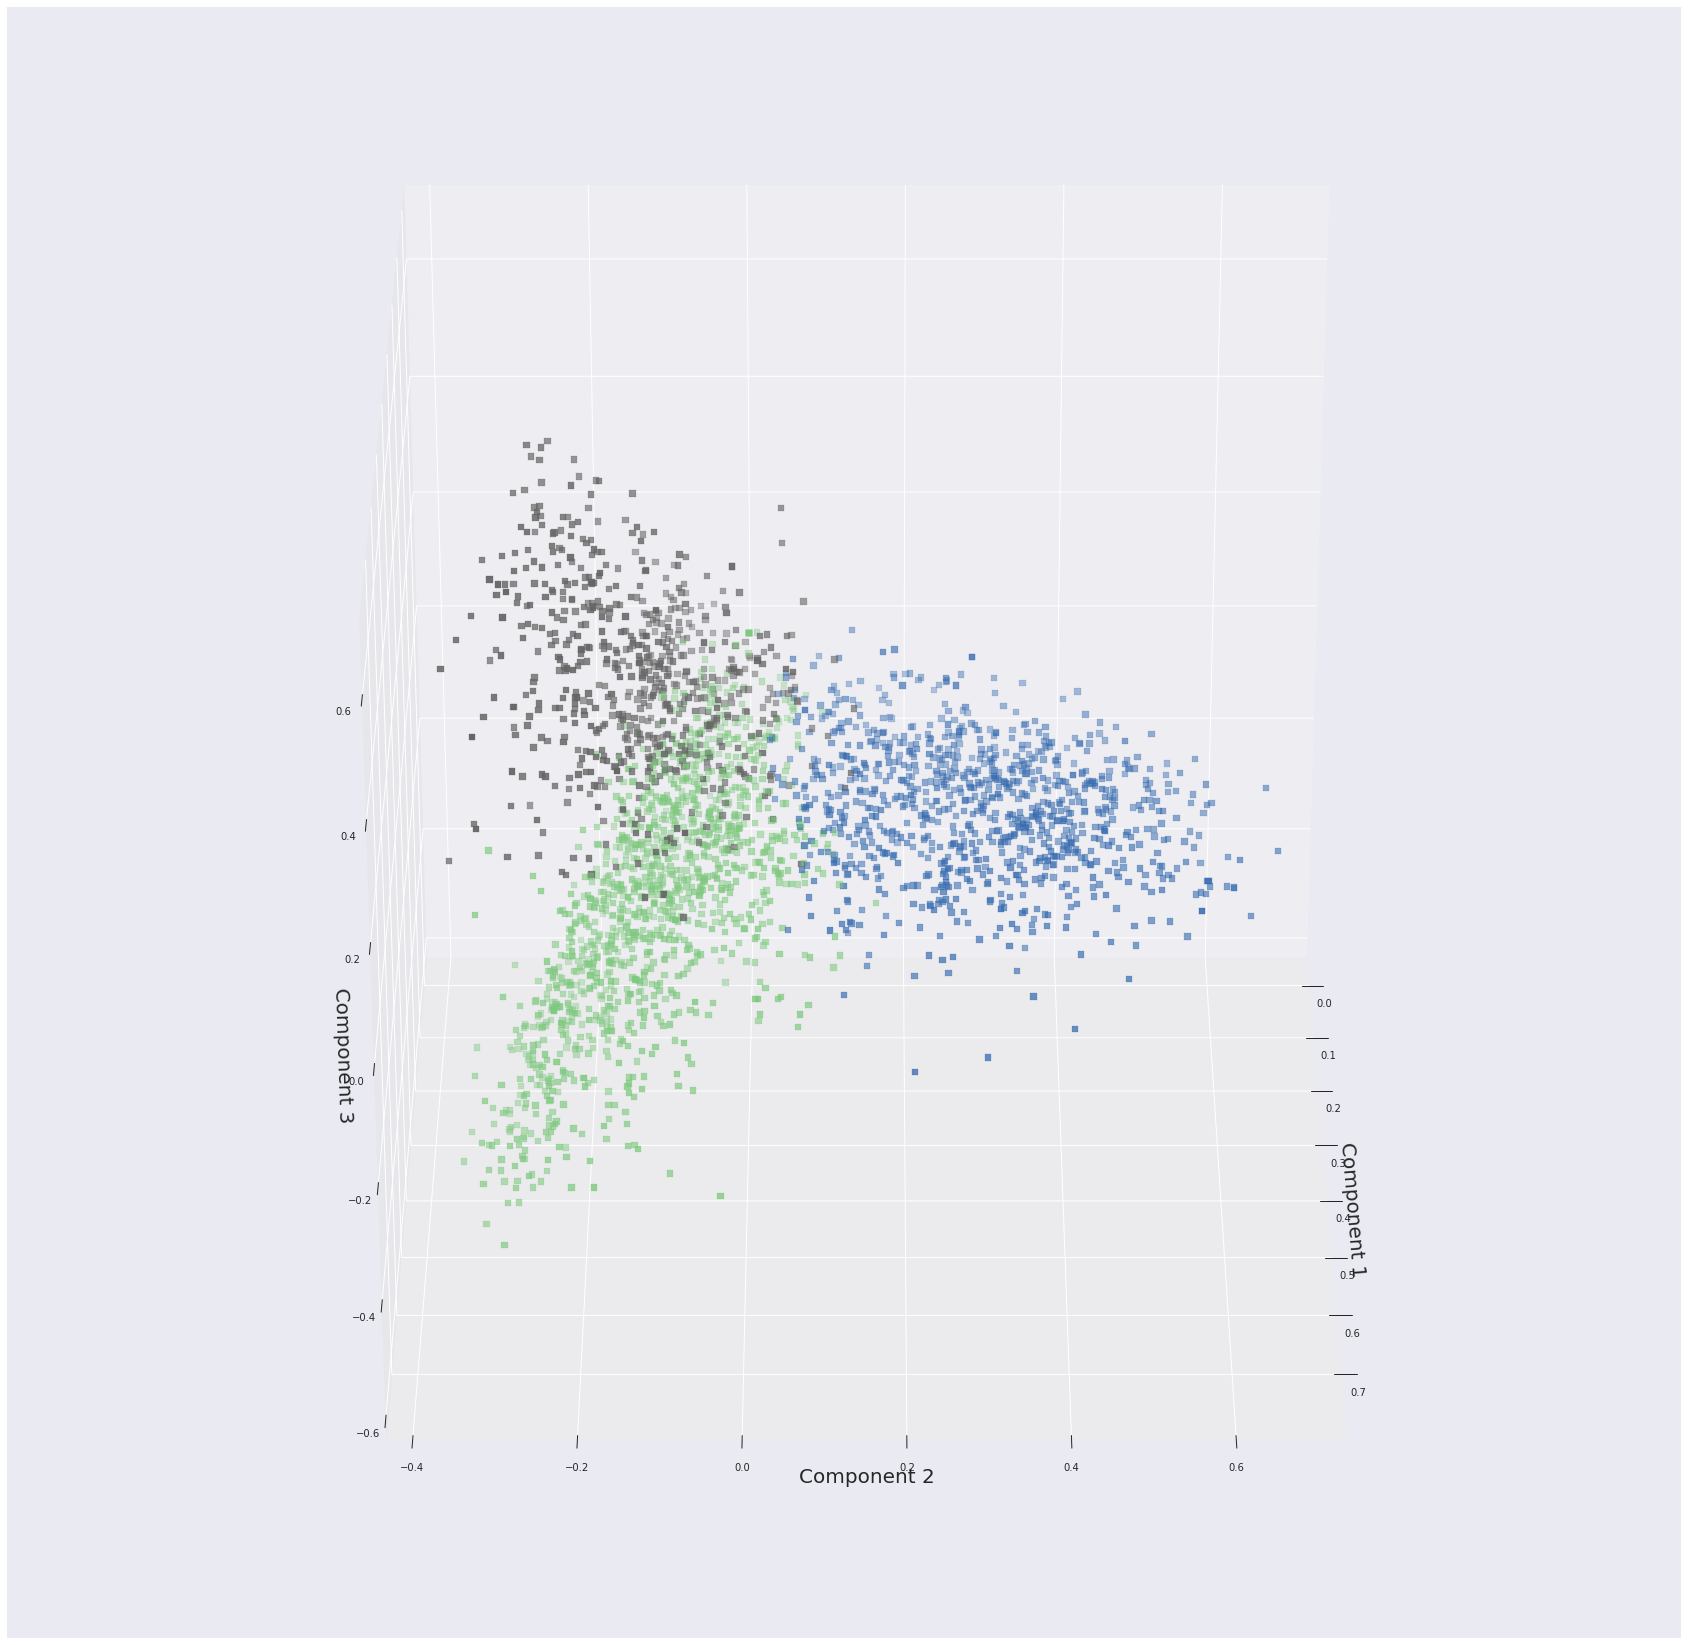

In [48]:
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(111, projection='3d')
x = np.array(df['component_1'])
y = np.array(df['component_2'])
z = np.array(df['component_3'])
ax.set_xlabel('Component 1', fontsize=20)
ax.set_ylabel('Component 2', fontsize=20)
ax.set_zlabel('Component 3', fontsize=20)

ax.scatter(x,y,z, marker="s", c=df["cluster"], s=40, cmap='Accent')
#ax.view_init(30, 135) 
ax.view_init(30, 0)

In [49]:
sns.set(font_scale= 1.5)

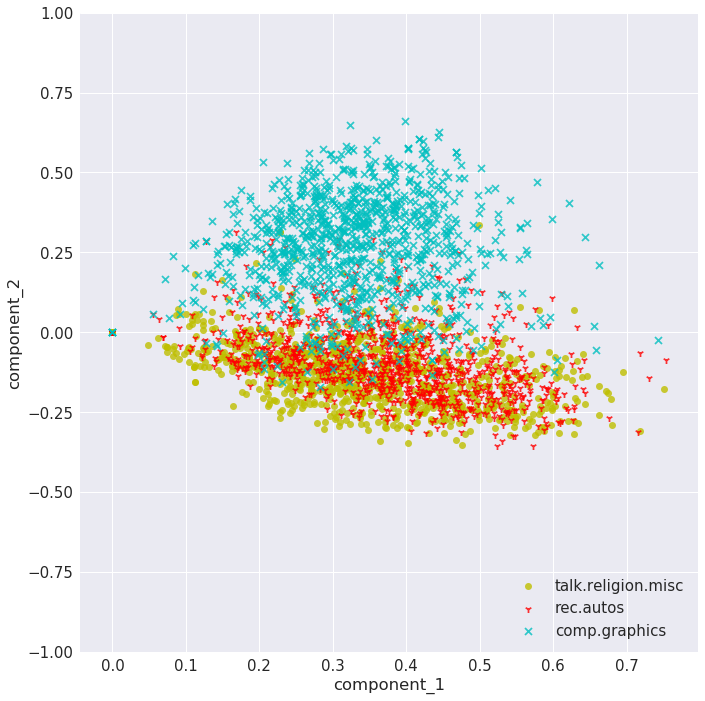

In [50]:
palette_cat = {
    'comp.graphics': 'c',
    'rec.autos':'r',
    'talk.religion.misc':'y'
}

pl = sns.lmplot(size= 10, x="component_1", y="component_2", data=df, fit_reg=False, hue='category', legend=False,  markers = ['o','1','x'], palette =palette_cat )
axes = pl.axes
axes[0,0].set_ylim(-1.,1)
plt.legend(loc='lower right')

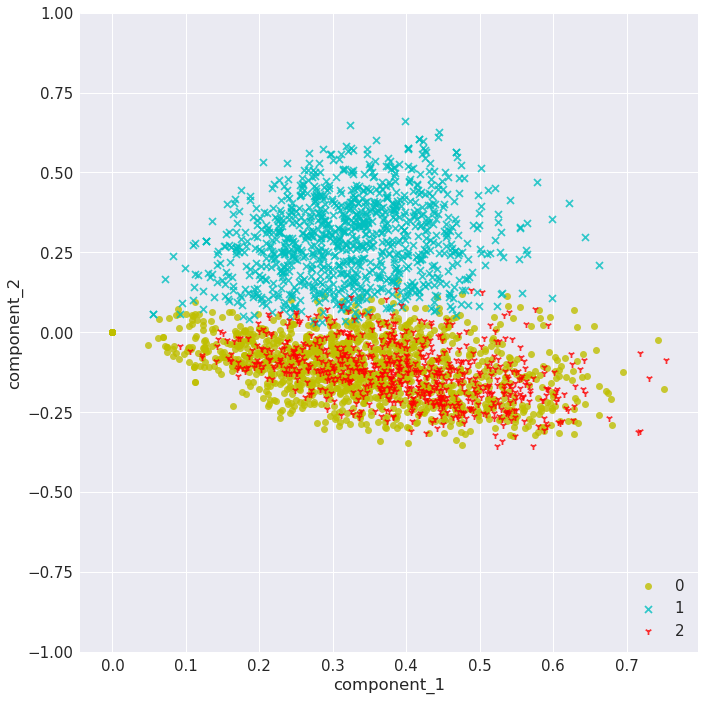

In [51]:
palette_clu = {
    0: 'y',
    2:'r',
    1:'c'
}
pl = sns.lmplot( size = 10, x="component_1", y="component_2", data=df, fit_reg=False, hue='cluster', legend=False, markers = ['o','x','1'], palette=palette_clu)
axes = pl.axes
axes[0,0].set_ylim(-1.,1)
plt.legend(loc='lower right')

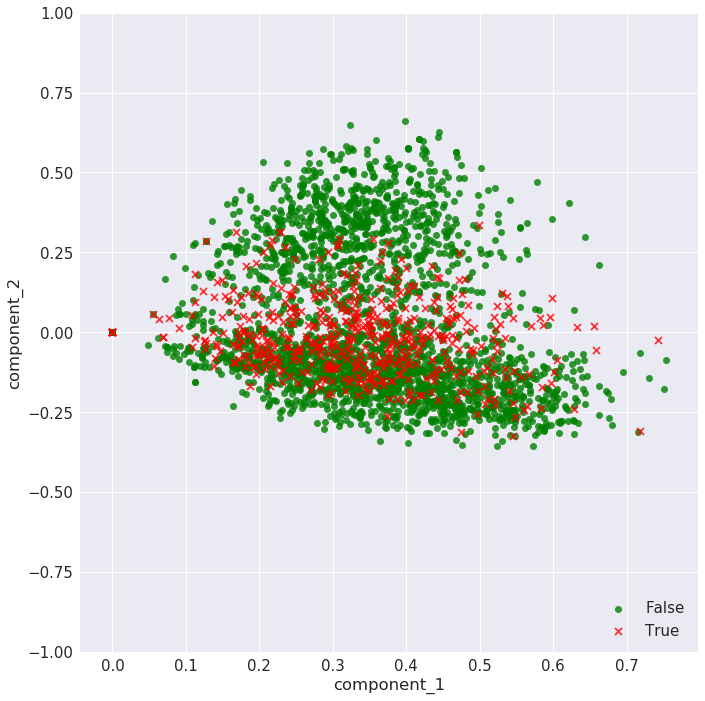

In [52]:
palette_misc = {
    True: 'r',
    False: 'g'
}
pl = sns.lmplot(size = 10, x="component_1", y="component_2", data=df, fit_reg=False, hue='misclassified', legend=False, markers = ['o','x'], 
                 palette=palette_misc)
axes = pl.axes
axes[0,0].set_ylim(-1.,1)
plt.legend(loc='lower right')

In [53]:
with open('sv.pkl', 'rb') as f:
        sv_list= pickle.load(f)

In [23]:
sv_list

array([11.03226971,  6.51831811,  6.28536115,  5.14016094,  4.61517807,
        4.52766212,  4.38707987,  4.23998025,  4.14263839,  4.09958543,
        4.03904986,  3.98139744,  3.92517755,  3.90135678,  3.82090134,
        3.74868546,  3.6816759 ,  3.63006487,  3.58601942,  3.5265402 ,
        3.46233266,  3.45846985,  3.44700332,  3.41331375,  3.3824046 ,
        3.34738038,  3.34318851,  3.31471841,  3.27643201,  3.26501548,
        3.24005053,  3.22874896,  3.17101919,  3.16226447,  3.1510444 ,
        3.1255278 ,  3.12134599,  3.1030772 ,  3.09271671,  3.0763933 ,
        3.04339375,  3.01105842,  3.00182853,  2.96691264,  2.96405073,
        2.95022064,  2.9309894 ,  2.90808918,  2.89445299,  2.86851935])

Text(0.5,1,'Singular Values')

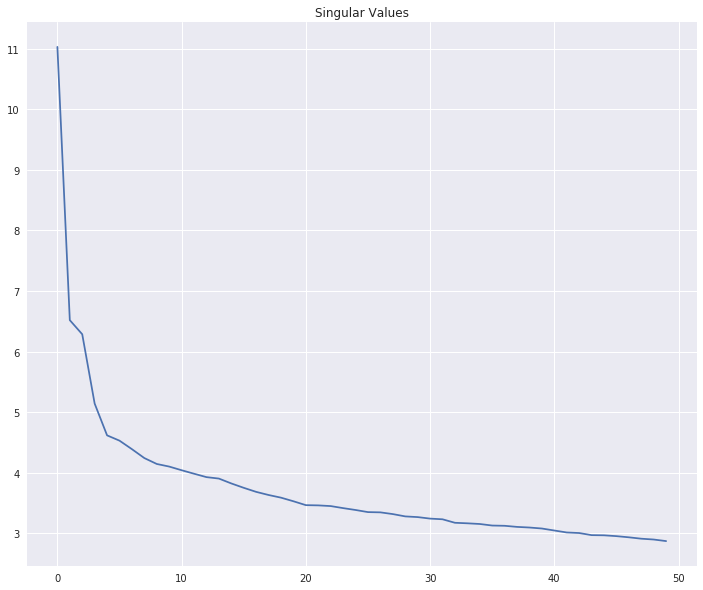

In [93]:
plt.figure(figsize=(12,10))
plt.plot(sv_list)
plt.title('Singular Values')